# MODULE 1: IMPORTING THE LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MODULE 2: IMPORTING THE DATASET

In [4]:
df = pd.read_csv("Google-Playstore.csv")

# MODULE 3: DATA PREPROCESSING

In [5]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [6]:
print(df.shape)

(2312944, 24)


In [7]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [8]:
df = df.drop(['App Id','Developer Website','Developer Email','Privacy Policy','Currency','Minimum Installs','In App Purchases','Size', 'Editors Choice', 'Released', 'Last Updated',
        'Ad Supported','Maximum Installs','Developer Id','Price','Scraped Time','Minimum Android'],axis=1)


In [9]:
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Content Rating
0,Gakondo,Adventure,0.0,0.0,10+,True,Everyone
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",True,Everyone
2,Vibook,Productivity,0.0,0.0,50+,True,Everyone
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,True,Everyone
4,GROW.me,Tools,0.0,0.0,100+,True,Everyone


In [10]:
df.isnull().sum()

App Name              2
Category              0
Rating            22883
Rating Count      22883
Installs            107
Free                  0
Content Rating        0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df = df.drop_duplicates(subset=df.columns.difference(['App Name']))

In [13]:
print(df.shape)

(620860, 7)


In [14]:
df.isnull().sum()

App Name          0
Category          0
Rating            0
Rating Count      0
Installs          0
Free              0
Content Rating    0
dtype: int64

In [15]:
df['Content Rating'] = df['Content Rating'].replace('Unrated',"Everyone")
df['Content Rating'] = df['Content Rating'].replace('Mature 17+',"Adults")
df['Content Rating'] = df['Content Rating'].replace('Adults only 18+',"Adults")
df['Content Rating'] = df['Content Rating'].replace('Everyone 10+',"Everyone")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620860 entries, 0 to 2312939
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   App Name        620860 non-null  object 
 1   Category        620860 non-null  object 
 2   Rating          620860 non-null  float64
 3   Rating Count    620860 non-null  float64
 4   Installs        620860 non-null  object 
 5   Free            620860 non-null  bool   
 6   Content Rating  620860 non-null  object 
dtypes: bool(1), float64(2), object(4)
memory usage: 33.7+ MB


In [17]:
df.Installs = df.Installs.str.replace(',','')
df.Installs = df.Installs.str.replace('+','')
df.Installs = df.Installs.str.replace('Free','0')
df['Installs'] = pd.to_numeric(df['Installs'])

/tmp/ipykernel_74452/3109335717.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Installs = df.Installs.str.replace('+','')


/home/karthikeya/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


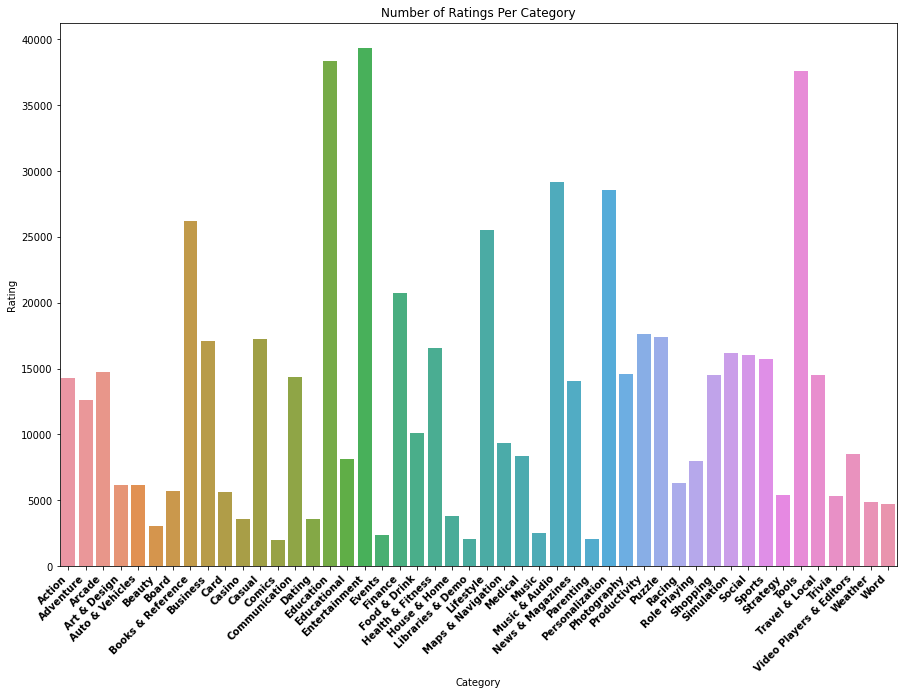

In [18]:
category_rating = df.groupby(['Category'])['Rating Count'].count()

plt.figure(figsize=(15,10))
sns.barplot(category_rating.index, category_rating.values)
plt.title('Number of Ratings Per Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');

In [19]:
df['Category'] = pd.factorize(df['Category'])[0].astype(int)
df['Free'] = pd.factorize(df['Free'])[0].astype(int)
df['Content Rating'] = pd.factorize(df['Content Rating'])[0].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620860 entries, 0 to 2312939
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   App Name        620860 non-null  object 
 1   Category        620860 non-null  int64  
 2   Rating          620860 non-null  float64
 3   Rating Count    620860 non-null  float64
 4   Installs        620860 non-null  int64  
 5   Free            620860 non-null  int64  
 6   Content Rating  620860 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 37.9+ MB


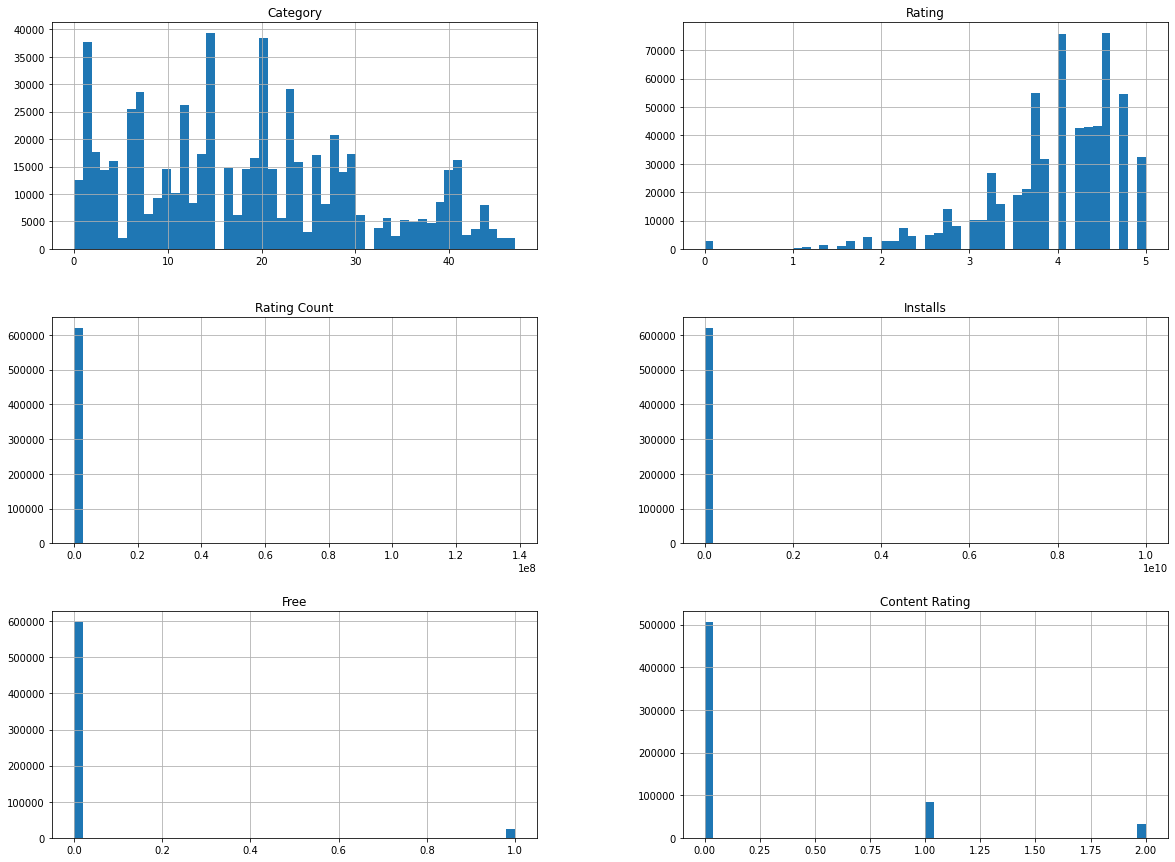

In [21]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
from sklearn.utils import shuffle
df = shuffle(df)

In [23]:
hic = df[:600000]


In [24]:
X = hic.drop(['Rating'],axis=1)
y = hic['Rating'].values


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)
apps_in_training_set = X_train.drop([ 'Category', 'Rating Count', 'Installs', 'Free','Content Rating'],axis=1).values
apps_in_test_set = X_test.drop([ 'Category', 'Rating Count','Installs', 'Free','Content Rating'],axis=1).values
X_train = X_train.drop(['App Name'],axis=1)
X_test = X_test.drop(['App Name'],axis=1)


# MODULE 4: BUILDING SUPPORT VECTOR MACHINE MODEL

In [26]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [27]:
y_pred = svr.predict(X_test)
y_pred = y_pred.round(1)

# MODULE 5: BUILDING RANDOM FOREST MODEL

In [28]:
from sklearn.ensemble import RandomForestRegressor
 
regressor = RandomForestRegressor()
 
regressor.fit(X_train,y_train) 

RandomForestRegressor()

In [29]:
z_pred = regressor.predict(X_test)
z_pred=  z_pred.round(1)

In [30]:
avg = ((y_pred+z_pred)/2)
avg = avg.round(1)

# MODULE 6: FETCHING THE TEST DATA

#### Support Vector Model

In [31]:
apps_in_test_set = apps_in_test_set.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
predictions = np.concatenate([apps_in_test_set, y_pred,y_test], axis = 1)
predictions = pd.DataFrame(predictions, columns = ['App Name', 'Predicted Rating','Actual Rating'])
predictions

,App Name,Predicted Rating,Actual Rating
0,I Was So Mad - Little Critter,4.1,4.6
1,Fixed Half Time Draws,4.1,4.0
2,"PDF Creator, Converter & Scanner",4.1,4.1
3,Xisnul Muslim Af-Somali,4.1,4.7
4,KH-App,4.1,3.9
...,...,...,...
2995,Hue Essentials - Philips Hue & TRÅDFRI,4.1,4.1
2996,Narro: Articles to Audio,4.1,3.6
2997,Ashpazi Irani آشپزی ایرانی,4.1,4.0
2998,PDF Creator | Text & Images to PDF,4.1,3.0


#### Random Forest Model

In [32]:
apps_in_test_set = apps_in_test_set.reshape(-1, 1)
z_pred = z_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
prediction = np.concatenate([apps_in_test_set, z_pred,y_test], axis = 1)
prediction = pd.DataFrame(prediction, columns = ['App Name', 'Predicted Rating','Actual Rating'])
prediction

,App Name,Predicted Rating,Actual Rating
0,I Was So Mad - Little Critter,3.9,4.6
1,Fixed Half Time Draws,3.4,4.0
2,"PDF Creator, Converter & Scanner",3.7,4.1
3,Xisnul Muslim Af-Somali,3.8,4.7
4,KH-App,3.9,3.9
...,...,...,...
2995,Hue Essentials - Philips Hue & TRÅDFRI,4.0,4.1
2996,Narro: Articles to Audio,3.1,3.6
2997,Ashpazi Irani آشپزی ایرانی,3.4,4.0
2998,PDF Creator | Text & Images to PDF,4.1,3.0


# MODULE 7: ACCURACY CALCULATION

#### Support Vector Model

In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5361
Mean Squared Error: 0.5702033333333332
Root Mean Squared Error: 0.7551180923096289


#### Random Forest Model

In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, z_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, z_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, z_pred)))

Mean Absolute Error: 0.5275333333333333
Mean Squared Error: 0.50382
Root Mean Squared Error: 0.7098027895126928


#### Average 

In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, avg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, avg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, avg)))

Mean Absolute Error: 0.5072
Mean Squared Error: 0.47024
Root Mean Squared Error: 0.6857404756903299


# MODULE 8: PREDICTION ON DATA FEATURES

In [36]:
apps_in_test_set = apps_in_test_set.reshape(-1, 1)
avg = avg.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
average = np.concatenate([apps_in_test_set, avg,y_test], axis = 1)
average = pd.DataFrame(average, columns = ['App Name', 'Predicted Rating','Actual Rating'])
average

,App Name,Predicted Rating,Actual Rating
0,I Was So Mad - Little Critter,4.0,4.6
1,Fixed Half Time Draws,3.8,4.0
2,"PDF Creator, Converter & Scanner",3.9,4.1
3,Xisnul Muslim Af-Somali,4.0,4.7
4,KH-App,4.0,3.9
...,...,...,...
2995,Hue Essentials - Philips Hue & TRÅDFRI,4.0,4.1
2996,Narro: Articles to Audio,3.6,3.6
2997,Ashpazi Irani آشپزی ایرانی,3.8,4.0
2998,PDF Creator | Text & Images to PDF,4.1,3.0
